In [200]:
import pandas as pd

# Creating the DateTime columns
df = pd.read_csv("./hsg_export_21.csv", sep = ";")
df["timestamp_message_UTC"] = pd.to_datetime(df["timestamp_message_UTC"], utc=True)
df["time_uct"] = df["timestamp_message_UTC"].dt.time
df["date_uct"] = df["timestamp_message_UTC"].dt.date
df.head(10)

,Unnamed: 0,timestamp_request_CET,ChargeStationID,SocketNumber,meter_point,timestamp_message_UTC,value,context,location,unit,status,oldStatus,time_uct,date_uct
0,1,2023-11-15 17:59:02,c9d021af-b27d-7ee2-1357-2cbf59eb343d,1,Power.Active.Import,2023-11-15 16:45:00+00:00,0,CLOCK_SAMPLE,OUTLET,WATTS,NaN,NaN,16:45:00,2023-11-15
1,2,2023-11-15 17:59:02,c9d021af-b27d-7ee2-1357-2cbf59eb343d,1,Temperature,2023-11-15 16:45:00+00:00,"19,3",CLOCK_SAMPLE,BODY,CELSIUS,NaN,NaN,16:45:00,2023-11-15
2,3,2023-11-15 17:59:02,c9d021af-b27d-7ee2-1357-2cbf59eb343d,1,Voltage,2023-11-15 16:45:00+00:00,0,CLOCK_SAMPLE,INLET,VOLTS,NaN,NaN,16:45:00,2023-11-15
3,4,2023-11-15 17:59:02,97e63f77-0047-42b0-84a4-ee3e88cee109,8,Energy.Active.Import.Register,2023-11-15 16:03:20+00:00,"5546937,1",PERIODIC_SAMPLE,OUTLET,WATT_HOURS,NaN,NaN,16:03:20,2023-11-15
4,5,2023-11-15 17:59:02,97e63f77-0047-42b0-84a4-ee3e88cee109,8,NaN,2023-11-15 16:18:26.662168+00:00,NaN,NaN,NaN,NaN,AVAILABLE,FINISHING,16:18:26.662168,2023-11-15
5,6,2023-11-15 17:59:02,97e63f77-0047-42b0-84a4-ee3e88cee109,1,Energy.Active.Import.Register,2023-11-15 16:44:00+00:00,"2535792,4",PERIODIC_SAMPLE,OUTLET,WATT_HOURS,NaN,NaN,16:44:00,2023-11-15
6,7,2023-11-15 17:59:02,97e63f77-0047-42b0-84a4-ee3e88cee109,9,Energy.Active.Import.Register,2023-11-15 15:31:36+00:00,"1141191,3",PERIODIC_SAMPLE,OUTLET,WATT_HOURS,NaN,NaN,15:31:36,2023-11-15
7,8,2023-11-15 17:59:02,97e63f77-0047-42b0-84a4-ee3e88cee109,9,NaN,2023-11-15 15:33:46.896015+00:00,NaN,NaN,NaN,NaN,AVAILABLE,FINISHING,15:33:46.896015,2023-11-15
8,9,2023-11-15 17:59:02,e68f5363-33ef-130c-a05a-3ed7e599d5f7,1,Energy.Active.Import.Register,2023-11-15 16:48:38+00:00,18840978,PERIODIC_SAMPLE,OUTLET,WATT_HOURS,NaN,NaN,16:48:38,2023-11-15
9,10,2023-11-15 17:59:02,e68f5363-33ef-130c-a05a-3ed7e599d5f7,1,NaN,2023-11-15 16:24:43.712221+00:00,NaN,NaN,NaN,NaN,SUSPENDED_VEHICLE,CHARGING,16:24:43.712221,2023-11-15


In [201]:
# Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232550 entries, 0 to 2232549
Data columns (total 14 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   Unnamed: 0             int64              
 1   timestamp_request_CET  object             
 2   ChargeStationID        object             
 3   SocketNumber           int64              
 4   meter_point            object             
 5   timestamp_message_UTC  datetime64[ns, UTC]
 6   value                  object             
 7   context                object             
 8   location               object             
 9   unit                   object             
 10  status                 object             
 11  oldStatus              object             
 12  time_uct               object             
 13  date_uct               object             
dtypes: datetime64[ns, UTC](1), int64(2), object(11)
memory usage: 238.5+ MB


In [202]:
df["ChargeStationID"].value_counts()

ChargeStationID
4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
0a5af9c9-f05a-bf52-fce5-c89917335f67     73216
                                         ...  
bfa39618-0573-dd16-643b-a67b4c447d36         2
5af7cd7b-37d2-e0b8-2e30-1f4091fb6bc8         2
a0772702-d936-4e45-a4ab-d13f9bc77bfa         2
e89b4108-4097-2153-5428-38d77f855226         1
2a7a13a2-e3e8-509b-02a3-f8909ecb88fe         1
Name: count, Length: 871, dtype: int64

In [203]:
dfshort = pd.read_csv("./hsg_export_short_21.csv", sep = ";")
dfshort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             100 non-null    int64 
 1   timestamp_request_CET  100 non-null    object
 2   ChargeStationID        100 non-null    object
 3   SocketNumber           100 non-null    int64 
 4   meter_point            78 non-null     object
 5   timestamp_message_UTC  100 non-null    object
 6   value                  78 non-null     object
 7   context                78 non-null     object
 8   location               78 non-null     object
 9   unit                   78 non-null     object
 10  status                 22 non-null     object
 11  oldStatus              22 non-null     object
dtypes: int64(2), object(10)
memory usage: 9.5+ KB


In [204]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

# Analyse der Ladestation ("49...")
l49 = df.loc[df["ChargeStationID"] == "4940a04d-62a0-adf5-fe81-b67dd755cecc"]
l49["SocketNumber"].value_counts()

SocketNumber
8     40235
12    36068
2     35478
10    34364
7     33617
3     25056
4     23294
5     17871
11     9153
9      6526
Name: count, dtype: int64

In [205]:
# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12

# Looking only at the values for one socket when a charge occured
l492 = l49.loc[(l49["SocketNumber"] == 2) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
l492

,Unnamed: 0,timestamp_request_CET,ChargeStationID,SocketNumber,meter_point,timestamp_message_UTC,value,context,location,unit,status,oldStatus,time_uct,date_uct
380356,380357,2023-11-16 16:43:26,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-16 15:43:11+00:00,"2789,2",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,15:43:11,2023-11-16
380620,380621,2023-11-16 16:44:34,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-16 15:44:11+00:00,"2788,9",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,15:44:11,2023-11-16
381330,381331,2023-11-16 16:45:27,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-16 15:45:11+00:00,"2471,9",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,15:45:11,2023-11-16
381643,381644,2023-11-16 16:46:27,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-16 15:46:11+00:00,"1644,6",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,15:46:11,2023-11-16
381939,381940,2023-11-16 16:47:26,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-16 15:47:11+00:00,"1542,3",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,15:47:11,2023-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218603,2218604,2023-11-21 07:11:08,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-21 06:10:48+00:00,"1743,3",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,06:10:48,2023-11-21
2218814,2218815,2023-11-21 07:12:07,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-21 06:11:48+00:00,1742,PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,06:11:48,2023-11-21
2219047,2219048,2023-11-21 07:13:08,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-21 06:12:48+00:00,"1644,9",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,06:12:48,2023-11-21
2219284,2219285,2023-11-21 07:14:07,4940a04d-62a0-adf5-fe81-b67dd755cecc,2,Power.Active.Import,2023-11-21 06:13:48+00:00,1643,PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,06:13:48,2023-11-21


In [206]:

l492.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 380356 to 2219688
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             1168 non-null   int64              
 1   timestamp_request_CET  1168 non-null   object             
 2   ChargeStationID        1168 non-null   object             
 3   SocketNumber           1168 non-null   int64              
 4   meter_point            1168 non-null   object             
 5   timestamp_message_UTC  1168 non-null   datetime64[ns, UTC]
 6   value                  1168 non-null   object             
 7   context                1168 non-null   object             
 8   location               1168 non-null   object             
 9   unit                   1168 non-null   object             
 10  status                 0 non-null      object             
 11  oldStatus              0 non-null      object        

In [207]:
l492["time_uct"].iloc[0]

datetime.time(15, 43, 11)

In [209]:
# Custom Function to analyse the times of charging

from datetime import timedelta
import pandas as pd


def charge_time(df_socket):
    global start_time, end_time, charge_list
    
    # Reset variables
    start_time = None
    end_time = None
    charge_list = []
    
    for i in df_socket["timestamp_message_UTC"]:
        if start_time is None:
            # First timestamp
            start_time = i
            charge_list.append(f"Date: {start_time.date()}")
            charge_list.append(f"Start Value: {start_time.time()}")
            end_time = start_time

        elif i == end_time + pd.to_timedelta("60s"):
            # Increment by 60 seconds
            end_time += pd.to_timedelta("60s")

        else:
            # End the previous charge
            charge_list.append(f"End Value: {end_time.time()}")
            
            # Start a new charge
            start_time = i
            charge_list.append(f"Date: {start_time.date()}")
            charge_list.append(f"Start Value: {start_time.time()}")
            end_time = start_time

    if end_time is not None:
        # End the last charge if applicable
        charge_list.append(f"End Value: {end_time.time()}")

    return charge_list

In [210]:
# Creating a custom function to portray the prior results in a DataFrame

def charge_time_df(charge_list):
    # Initialize empty lists to store data
    dates = []
    start_values = []
    end_values = []

    # Iterate through the list and extract information
    for i in range(0, len(charge_list), 3):
        dates.append(charge_list[i].split(': ')[1] if 'Date' in charge_list[i] else None)
        start_values.append(charge_list[i+1].split(': ')[1] if 'Start' in charge_list[i+1] else None)
        end_values.append(charge_list[i+2].split(': ')[1] if 'End' in charge_list[i+2] else None)

    # Create a DataFrame
    df = pd.DataFrame({
        'Date': dates,
        'Start Value': start_values,
        'End Value': end_values
    })

    return df

In [211]:
# Checking the result with socket 2 from the (49...) station
charge_time_df(charge_time(l492))

,Date,Start Value,End Value
0,2023-11-16,15:43:11,16:10:11
1,2023-11-16,17:25:11,17:49:11
2,2023-11-17,11:03:43,20:36:43
3,2023-11-20,05:52:43,06:13:43
4,2023-11-20,16:17:48,16:17:48
5,2023-11-20,16:19:48,16:19:48
6,2023-11-20,16:22:48,16:26:48
7,2023-11-20,16:28:48,00:33:48
8,2023-11-21,05:49:48,06:14:48


In [213]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analysis of #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l493 = l49.loc[(l49["SocketNumber"] == 3) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
l493.head()

,Unnamed: 0,timestamp_request_CET,ChargeStationID,SocketNumber,meter_point,timestamp_message_UTC,value,context,location,unit,status,oldStatus,time_uct,date_uct
191245,191246,2023-11-16 05:31:27,4940a04d-62a0-adf5-fe81-b67dd755cecc,3,Power.Active.Import,2023-11-16 04:30:43+00:00,2261,PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,04:30:43,2023-11-16
191435,191436,2023-11-16 05:32:27,4940a04d-62a0-adf5-fe81-b67dd755cecc,3,Power.Active.Import,2023-11-16 04:31:43+00:00,"2362,7",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,04:31:43,2023-11-16
191616,191617,2023-11-16 05:33:28,4940a04d-62a0-adf5-fe81-b67dd755cecc,3,Power.Active.Import,2023-11-16 04:32:43+00:00,"2469,8",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,04:32:43,2023-11-16
191804,191805,2023-11-16 05:34:27,4940a04d-62a0-adf5-fe81-b67dd755cecc,3,Power.Active.Import,2023-11-16 04:33:43+00:00,"2473,1",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,04:33:43,2023-11-16
192003,192004,2023-11-16 05:35:28,4940a04d-62a0-adf5-fe81-b67dd755cecc,3,Power.Active.Import,2023-11-16 04:34:43+00:00,"2471,4",PERIODIC_SAMPLE,OUTLET,WATTS,NaN,NaN,04:34:43,2023-11-16


In [214]:
charge_time_df(charge_time(l493))

,Date,Start Value,End Value
0,2023-11-16,04:30:43,04:59:43
1,2023-11-18,11:40:52,20:31:52
2,2023-11-20,04:30:52,04:59:52
3,2023-11-21,04:30:52,04:59:52


In [215]:
charge_time(l493)

['Date: 2023-11-16',
 'Start Value: 04:30:43',
 'End Value: 04:59:43',
 'Date: 2023-11-18',
 'Start Value: 11:40:52',
 'End Value: 20:31:52',
 'Date: 2023-11-20',
 'Start Value: 04:30:52',
 'End Value: 04:59:52',
 'Date: 2023-11-21',
 'Start Value: 04:30:52',
 'End Value: 04:59:52']

In [216]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analysis of #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l494 = l49.loc[(l49["SocketNumber"] == 4) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
l494.head()

charge_time_df(charge_time(l494))

,Date,Start Value,End Value
0,2023-11-16,16:21:13,16:21:13
1,2023-11-16,17:50:13,21:22:13
2,2023-11-16,21:24:13,04:50:13
3,2023-11-17,05:40:13,06:09:13
4,2023-11-17,18:49:11,18:56:11
5,2023-11-17,19:36:11,20:14:11
6,2023-11-17,20:33:11,03:24:11
7,2023-11-20,05:40:11,06:09:11


In [217]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l495 = l49.loc[(l49["SocketNumber"] == 5) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
l494.head()

charge_time_df(charge_time(l495))

# noticing an error for socket 5, there should be less charge times

,Date,Start Value,End Value
0,2023-11-16,06:55:06,07:02:06
1,2023-11-16,07:07:06,08:24:06
2,2023-11-16,08:23:06,08:23:06
3,2023-11-16,08:25:06,08:25:06
4,2023-11-16,08:25:06,10:09:06
5,2023-11-19,10:50:20,13:23:20


In [218]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l491 = l49.loc[(l49["SocketNumber"] == 1) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()

charge_time_df(charge_time(l491))

,Date,Start Value,End Value


In [219]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l497 = l49.loc[(l49["SocketNumber"] == 7) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()

charge_time_df(charge_time(l497))

,Date,Start Value,End Value
0,2023-11-15,23:43:25,05:43:25
1,2023-11-16,09:52:50,10:45:50
2,2023-11-16,21:31:41,02:32:41
3,2023-11-17,10:33:41,10:36:41
4,2023-11-17,10:38:41,16:37:41
5,2023-11-19,00:41:41,06:41:41
6,2023-11-20,14:45:41,14:50:41


In [220]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l498 = l49.loc[(l49["SocketNumber"] == 8) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l498))

,Date,Start Value,End Value


In [221]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49


# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l499 = l49.loc[(l49["SocketNumber"] == 9) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l499))

,Date,Start Value,End Value


In [222]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4910 = l49.loc[(l49["SocketNumber"] == 10) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l4910))

#noticing an error, this should only be one charge time

,Date,Start Value,End Value
0,2023-11-15,16:59:22,17:00:22
1,2023-11-15,17:00:22,18:48:22


In [225]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4911 = l49.loc[(l49["SocketNumber"] == 11) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l4911))

,Date,Start Value,End Value
0,2023-11-15,16:59:35,19:38:35
1,2023-11-20,14:32:47,16:20:47
2,2023-11-20,16:22:47,16:26:47
3,2023-11-20,16:28:47,21:30:47


In [226]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4912 = l49.loc[(l49["SocketNumber"] == 12) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l4912))

# a similar error appears, there should be fewer charge durations

,Date,Start Value,End Value
0,2023-11-15,16:59:39,20:16:39
1,2023-11-15,20:16:39,20:17:39
2,2023-11-15,20:17:39,20:18:39
3,2023-11-15,20:18:39,20:19:39
4,2023-11-15,20:19:39,20:20:39
5,2023-11-15,20:20:39,20:21:39
6,2023-11-15,20:21:39,20:22:39
7,2023-11-15,20:22:39,01:34:39
8,2023-11-16,04:50:39,05:19:39
9,2023-11-16,17:25:58,23:02:58


In [229]:
# Reworking the custom function to fix the prior errors

def charge_time(df_socket):
    charge_list = []
    current_charge = []

    for index, row in df_socket.iterrows():
        timestamp = row["timestamp_message_UTC"]

        if not current_charge:
            # Start a new charge
            current_charge = [timestamp, timestamp]
        elif timestamp - current_charge[1] <= pd.to_timedelta("1 minute"):
            # Extend the current charge
            current_charge[1] = timestamp
        else:
            # End the current charge and start a new one
            charge_list.append(current_charge)
            current_charge = [timestamp, timestamp]

    # Add the last charge if applicable
    if current_charge:
        charge_list.append(current_charge)

    # Convert to the desired output format
    output_list = []
    for charge in charge_list:
        output_list.append(f"Date: {charge[0].date()}")
        output_list.append(f"Start Value: {charge[0].time()}")
        output_list.append(f"End Value: {charge[1].time()}")
        #output_list.append("")

    return output_list

In [230]:
#4940a04d-62a0-adf5-fe81-b67dd755cecc    261662
#c9d021af-b27d-7ee2-1357-2cbf59eb343d    152686
#abf8e17f-d0aa-e094-b5cb-1b01d712f708    105557
#df6f7a35-4276-81bf-5a88-822c447d9dc4     93873
#0a5af9c9-f05a-bf52-fce5-c89917335f67     73216

#Analyse von #49
#l49 = df.loc[df["ChargeStationID"] == "4940a04d-62a0-adf5-fe81-b67dd755cecc"]
#l49["SocketNumber"].value_counts()

# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4910 = l49.loc[(l49["SocketNumber"] == 10) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l4910))

# Error for socket 10 is gone

,Date,Start Value,End Value
0,2023-11-15,16:59:22,18:48:22


In [231]:
# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l495 = l49.loc[(l49["SocketNumber"] == 5) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l495))

# Error for socket 5 is gone

,Date,Start Value,End Value
0,2023-11-16,06:55:06,07:02:06
1,2023-11-16,07:07:06,08:23:06
2,2023-11-16,08:25:06,10:09:06
3,2023-11-19,10:50:20,13:23:20


In [232]:
# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4912 = l49.loc[(l49["SocketNumber"] == 12) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
charge_time_df(charge_time(l4912))

# Error for socket 12 is gone

,Date,Start Value,End Value
0,2023-11-15,16:59:39,01:34:39
1,2023-11-16,04:50:39,05:19:39
2,2023-11-16,17:25:58,23:02:58
3,2023-11-16,23:04:58,03:32:58
4,2023-11-17,04:50:58,05:19:58
5,2023-11-17,10:58:04,12:09:04
6,2023-11-17,12:11:04,13:56:04
7,2023-11-20,04:50:04,05:19:04
8,2023-11-21,04:50:04,05:19:04


In [246]:
# Sockets: 2, 3, 4, 5, 7, 8, 9, 10, 11, 12
l4912 = l49.loc[(l49["SocketNumber"] == 12) & (l49["meter_point"] == "Power.Active.Import ") & (l49["value"] != "0")].copy()
df_l4912 = charge_time_df(charge_time(l4912))

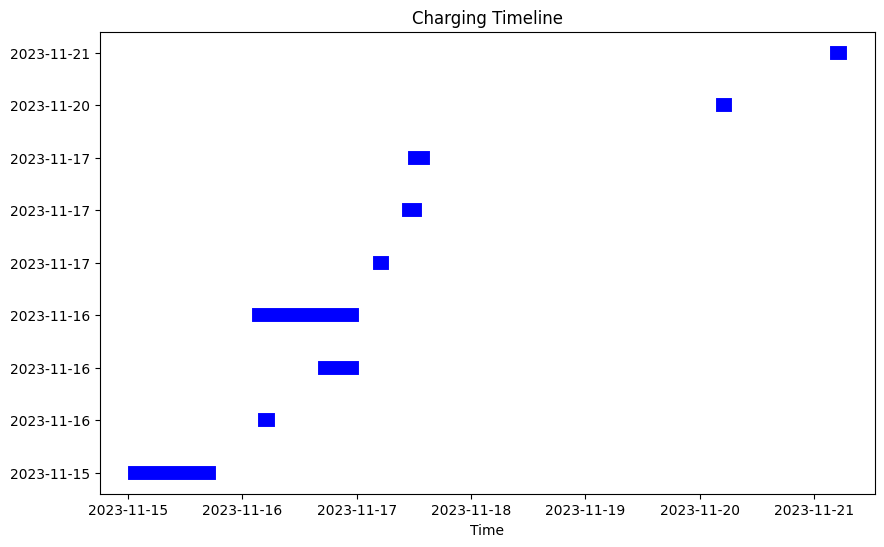

In [247]:
# Trying to visualize the results of one socket

import matplotlib.pyplot as plt
from matplotlib.dates import date2num

df= df_l4912

# Convert strings to datetime objects for plotting
df['Start Value'] = pd.to_datetime(df['Date'] + ' ' + df['Start Value'])
df['End Value'] = pd.to_datetime(df['Date'] + ' ' + df['End Value'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df.iterrows():
    start_time = date2num(row['Start Value'])
    end_time = date2num(row['End Value'])
    ax.plot([start_time, end_time], [i, i], color='blue', linewidth=10)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Date'])
ax.xaxis_date()

plt.xlabel('Time')
plt.title('Charging Timeline')
plt.show()